### Import

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import diffprivlib

from sklearn import datasets
from sklearn.model_selection import train_test_split
from diffprivlib.models import GaussianNB as ibmNB
from sklearn.naive_bayes import GaussianNB as skNB
from tqdm import tqdm
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load Data

In [4]:
dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

### Run Differential Privacy and Baseline Algorithms

In [5]:
epsilons = np.logspace(-2, 2, 30)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracies = []
for r in range(40):
    for epsilon in epsilons:
        clf = ibmNB(bounds=bounds, epsilon=epsilon)
        clf.fit(X_train, y_train)
        ac1 = clf.score(X_test, y_test)
        clf = skNB()
        clf.fit(X_train, y_train)
        ac2 = clf.score(X_test, y_test)
        accuracies.append((ac1,ac2))
accuracies = np.array(accuracies)

### Average and Plot

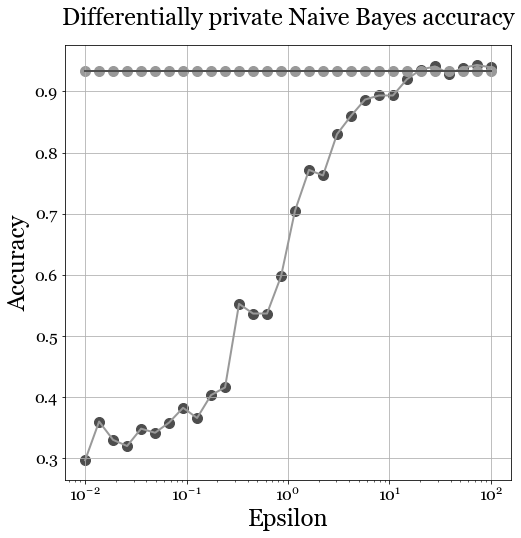

In [6]:
accuracies = np.reshape(accuracies,(40,30,2))
maccuracies = np.mean(accuracies,axis=0)
plt.figure(figsize=(8,8))
plt.scatter(epsilons, maccuracies[:,0],s=100,facecolor=(0.3,0.3,0.3))
plt.scatter(epsilons, maccuracies[:,1],s=100,facecolor=(0.6,0.6,0.6))
plt.semilogx(epsilons, maccuracies[:,0],color=(0.6,0.6,0.6),lw=2)
plt.semilogx(epsilons, maccuracies[:,1],color=(0.3,0.3,0.3),lw=2)
plt.title("Differentially private Naive Bayes accuracy",**csfont,fontsize=24,pad=20)
plt.xlabel("Epsilon",**csfont,fontsize=24)
plt.ylabel("Accuracy",**csfont,fontsize=24)
plt.xticks(**csfont,fontsize=16)
plt.yticks(**csfont,fontsize=16)
plt.grid()